# Car Price Prediction - ML Case Study

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the Dataset

df = pd.read_csv("car_data.csv")

### *Exploratory Data Analysis and manipulating the data frame*

In [3]:
#Getting the overview of the dataset

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Getting the size of the dataset

df.shape

(301, 9)

In [5]:
## Printing All the Unique values of categorical features

print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
#Check Missing Values in the dataset

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Description of the dataset

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#Getting the columns of the dataset

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
#Removing the non-useful column Car_Name

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
#Details about the final dataset

final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
#Adding new row 'Current Year' to the dataset to calculate the age of the car

final_dataset['Current_Year'] = 2021

In [12]:
#Calculating the age of the car and storing it in 'No_of-year'

final_dataset['No_of_year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [13]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021,4


In [14]:
#Dropping Column Year and Current_Year

final_dataset.drop(['Year'], axis = 1, inplace=True)
final_dataset.drop(['Current_Year'], axis = 1, inplace=True)

In [15]:
#Seperating the Categorical Variables in the dataset

final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [16]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [17]:
#Finding the correlation between the features

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


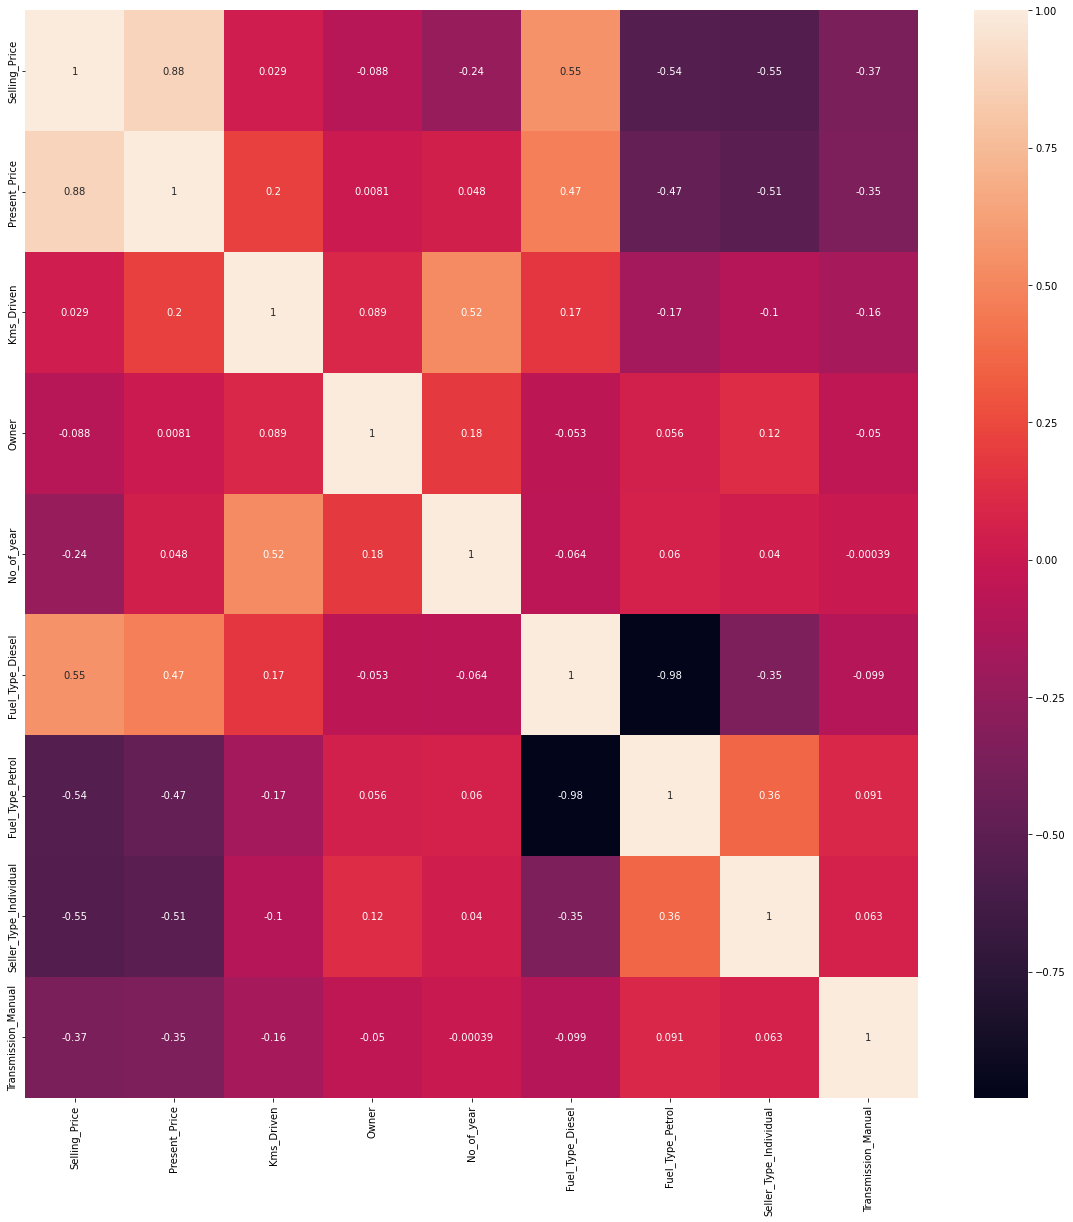

In [18]:
#Generating the HeatMap of the correlation

final_dataset.corr()
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset.corr(),annot=True)

# *Model Selection and Car Price Prediction*

In the present price prediction we have used RandomForestRegressor to predict the prices of the cars. Also RandomizedSearchCV was used to tune the Hyperparameters.

In [19]:
#Seperating the dependent and independent features from the dataframe

X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [20]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [21]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [22]:
##Finding the Feature Importance from ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

[0.35581388 0.04096622 0.00088548 0.07330387 0.24015761 0.01200927
 0.13463511 0.14222855]


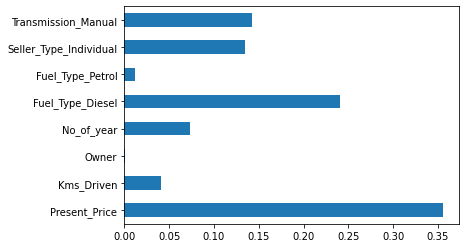

In [23]:
#Plotting feature importances

feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.plot(kind= 'barh')
plt.show()

In [24]:
#Splitting the data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [25]:
X_train

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
71,12.48,45000,0,10,1,0,0,1
206,7.13,12479,0,4,0,1,0,1
88,6.05,47000,0,8,0,1,0,1
46,4.89,64532,0,8,0,1,0,1
122,1.17,6000,0,5,0,1,1,1
...,...,...,...,...,...,...,...,...
250,13.60,35934,0,5,1,0,0,1
274,6.80,16500,0,7,0,1,0,1
219,9.40,36000,0,9,0,1,0,1
76,14.68,72000,0,8,0,1,0,1


In [26]:
X_test

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
214,5.70,20114,0,4,0,1,0,1
124,1.75,11500,0,9,0,1,1,1
140,1.20,32000,0,8,0,1,1,1
253,9.90,48000,0,7,1,0,0,1
179,1.05,213000,0,11,0,1,1,1
...,...,...,...,...,...,...,...,...
106,3.45,16500,1,7,0,1,1,1
234,5.70,4492,0,6,0,1,0,1
289,13.60,10980,0,5,0,1,0,1
70,6.76,71000,0,7,1,0,0,1


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [28]:
##Defining the Parameters

#Number of trees in random forest
n_estimator = [int(x) for x in np.linspace(start = 100, stop= 1200, num = 12)]

#No of features to consider in every split
max_features = ['auto', 'sqrt']


max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [29]:
#Creating the Grid for RandomizedSearch CV

random_grid = {'n_estimators': n_estimator,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
    
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
#Using RandomizedSearchCV for Hyperparameter tuning

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 2, random_state = 42, n_jobs= 1)

In [31]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
#Prediction the results using Random Forest

predictions = rf_random.predict(X_test)
predictions

array([ 5.16546587,  1.12418133,  0.80676339,  5.99127858,  0.421241  ,
        0.26891696,  9.77737135,  4.41999141,  2.91845233,  0.42904657,
        3.02711594, 16.57462855,  5.82267749,  2.66099607, 20.8551934 ,
        0.4817009 ,  7.50506653,  4.80890239,  9.42993954,  0.42213067,
        0.67150568,  7.35678523,  1.30174607,  0.28918547,  0.422986  ,
        2.904817  ,  2.59969187,  5.79722831,  4.37255986,  7.77694445,
        3.08651865,  7.55333521,  1.86164132,  7.200879  ,  1.2148915 ,
        9.60282029,  2.91413261,  5.33417065,  4.03460905,  0.37649333,
        7.04545433,  2.91433523,  8.02873199,  0.22884337,  8.06393326,
        8.12990848,  4.21909446,  1.06317593,  1.00242743,  0.69355409,
        5.50283638, 12.00224046,  0.4009064 ,  4.7276705 ,  7.96994205,
        5.85990074,  1.85870507,  5.10998298, 11.13167752,  4.15470564,
        5.96917288])

C:\ProgramData\Anaconda3\envs\carpricepred1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

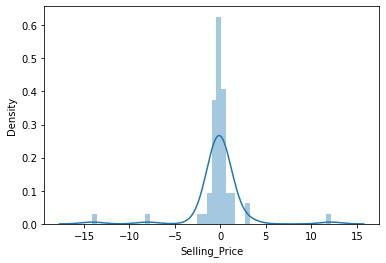

In [43]:
#Creating the distplot as a difference between the actual data and the predicted data
#The plot is normal indicating that the prediction results are pretty good.

sns.distplot(y_test-predictions)

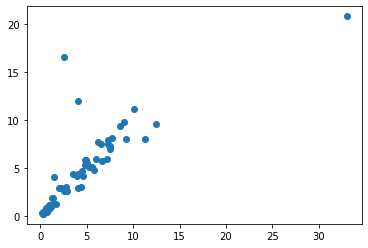

In [44]:
#Creating the scatter plot between the actual data and the predicted data
#The plot is almost linear indicating that the prediction results are pretty good.

plt.scatter(y_test,predictions)

In [45]:
#Storing the model in a file using Pickle Library

import pickle

file = open('random_forest_regressor_carpred.pk1','wb')
pickle.dump(rf_random,file)